# Segundo Punto - Clustering Jerárquico con el Dataset Seeds

Se usará el algoritmo de clustering jerárquico con los diferentes criterios de enlazamiento (linkage) para agrupar los datos del dataset Seeds. Finalmente, se analizarán los diferentes puntos de corte para el agrupamiento y se determinará el número óptimo de clusters.

## 1. Carga de Datos y Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
column_names = [
    'area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel',
    'asymmetry_coefficient', 'length_of_kernel_groove', 'class'
]
df = pd.read_csv(url, header=None, names=column_names, sep='\s+')

X = df.drop('class', axis=1)
y = df['class']

df.head()

<>:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\carlo\AppData\Local\Temp\ipykernel_29480\2449900071.py:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv(url, header=None, names=column_names, sep='\s+')


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 2. Preparación de Datos

Es fundamental escalar las características para que todas tengan la misma importancia en el cálculo de distancias.

In [2]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Clustering Jerárquico con Diferentes Enlaces

Ahora, aplicaremos el clustering jerárquico aglomerativo utilizando diferentes métodos de enlace ('linkage') para observar cómo afectan la estructura de los clusters.

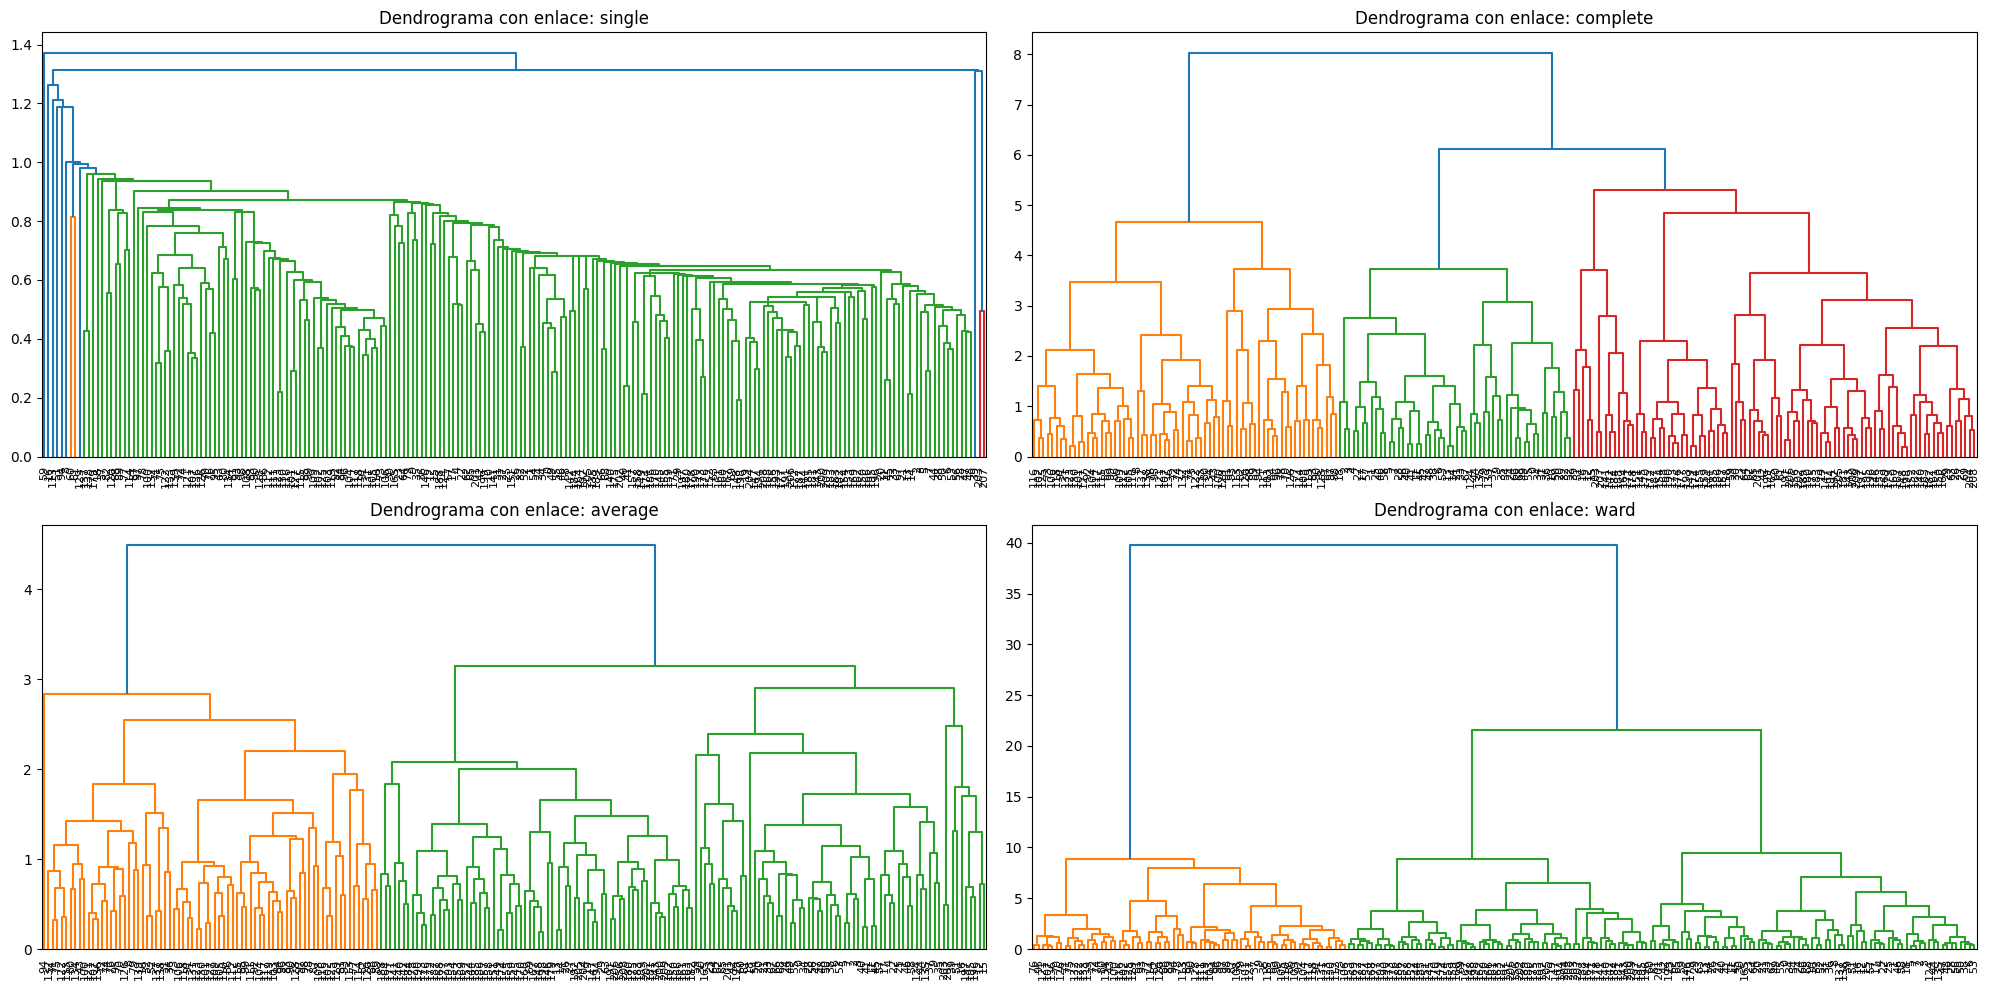

In [3]:
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    plt.title(f'Dendrograma con enlace: {method}')
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

plt.tight_layout()
plt.show()

De los dendrogramas, se puede observar que el enlace **ward** parece producir los clusters más balanceados y bien separados, lo que es ideal para este tipo de análisis.

## 4. Análisis de Puntos de Corte

Usaremos el dendrograma con el enlace de **Ward** para analizar los puntos de corte y determinar el número óptimo de clusters. También utilizaremos métricas cuantitativas como el coeficiente de silueta y el índice de Calinski-Harabasz.

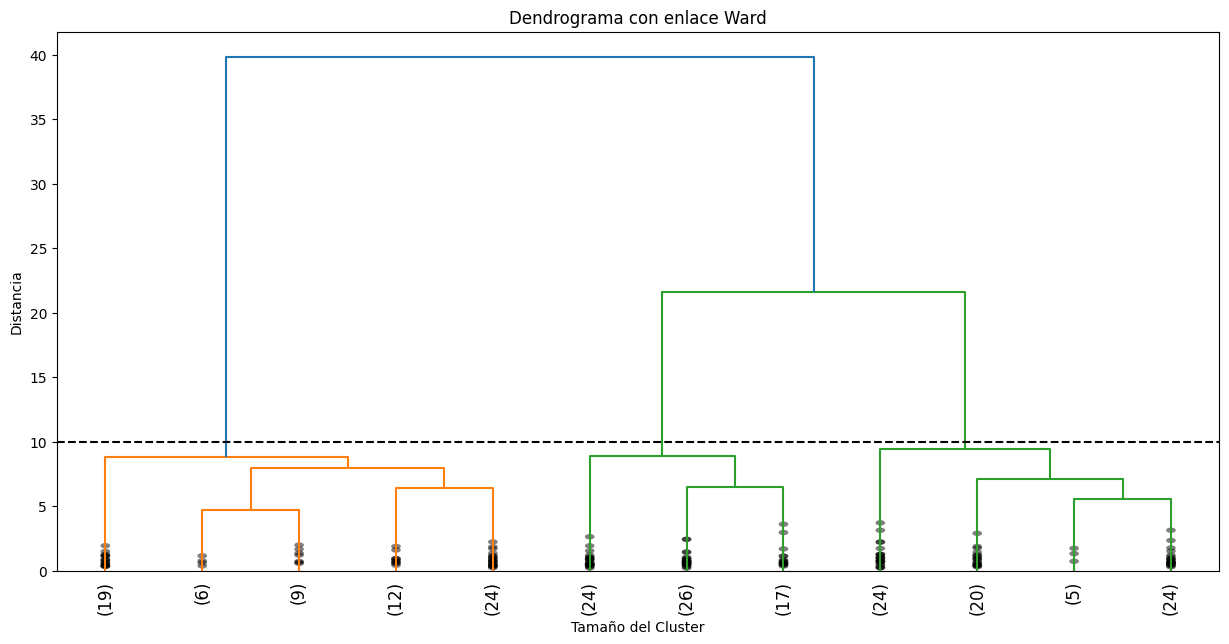

In [4]:
plt.figure(figsize=(15, 7))
plt.title('Dendrograma con enlace Ward')
Z_ward = linkage(X_scaled, method='ward')
dendrogram(Z_ward, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)

# Añadir una línea de corte para visualizar la formación de clusters
plt.axhline(y=10, c='k', linestyle='--')
plt.xlabel('Tamaño del Cluster')
plt.ylabel('Distancia')
plt.show()

El dendrograma sugiere que un corte en una distancia de 10 resultaría en 3 clusters, lo que coincide con el número real de clases en el dataset. Ahora, validaremos esto con métricas cuantitativas.

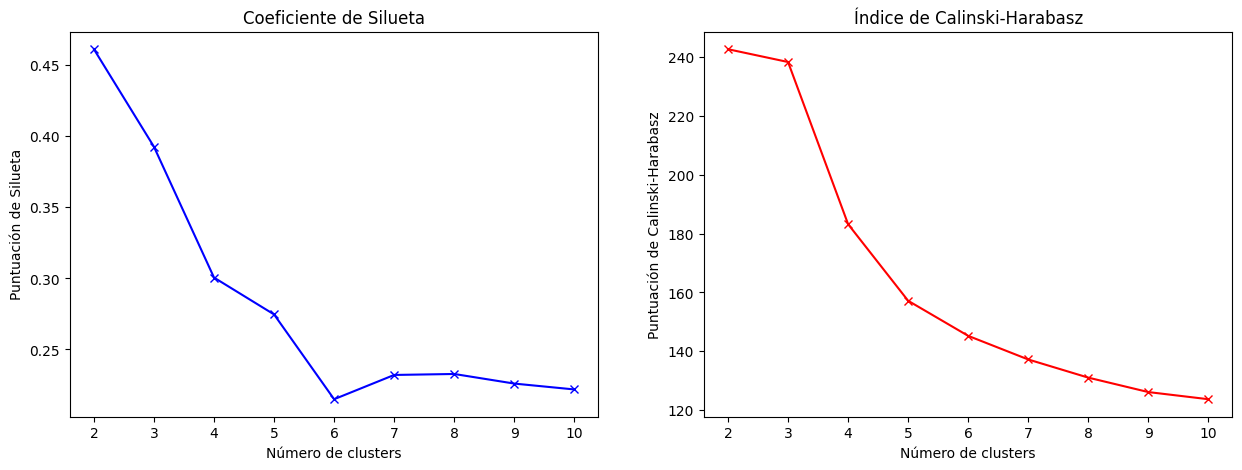

In [5]:
silhouette_scores = []
calinski_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    calinski_avg = calinski_harabasz_score(X_scaled, cluster_labels)
    calinski_scores.append(calinski_avg)

# Graficar los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(range_n_clusters, silhouette_scores, 'bx-')
ax1.set_title('Coeficiente de Silueta')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Puntuación de Silueta')

ax2.plot(range_n_clusters, calinski_scores, 'rx-')
ax2.set_title('Índice de Calinski-Harabasz')
ax2.set_xlabel('Número de clusters')
ax2.set_ylabel('Puntuación de Calinski-Harabasz')

plt.show()

## 5. Conclusiones

1.  **Número Óptimo de Clusters**: Tanto el análisis del dendrograma como las métricas de evaluación (coeficiente de silueta y Calinski-Harabasz) sugieren que el número óptimo de clusters es 3. Esto es consistente con el número real de clases en el dataset.

2.  **Método de Enlace**: El enlace 'ward' fue el más efectivo para identificar la estructura subyacente de los datos, produciendo clusters claros y bien definidos que se alinean con las clases reales.

3.  **Validación**: La combinación del análisis visual del dendrograma con métricas cuantitativas proporcionó un enfoque robusto para validar el número de clusters. Los picos en ambas métricas para k=3 confirman que esta es la agrupación más natural para los datos.